In [1]:
from datetime import datetime

import geopandas as gp
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data_dir = '../data/internet/'
whle_dir = data_dir + 'ph_internet_whole/ph_fixedinternet_whole.shp'
whole_ph_dir = '../data/internet/philippine_boundary/PHL_adm0.shp'
centroids_dir = '../data/ndhs/ndhs-centroids/DHS Clusters Points.shp'

In [3]:
whole_ph = gp.read_file(whole_ph_dir).to_crs('+proj=cea')
centroids_ = gp.read_file(centroids_dir).to_crs('+proj=cea')
fixed_net = gp.read_file(whle_dir).to_crs('+proj=cea')

In [9]:
admindiv = gp.read_file('../data/internet/ph_level2admin/PHL_adm2.shp').to_crs('+proj=cea')

<AxesSubplot:>

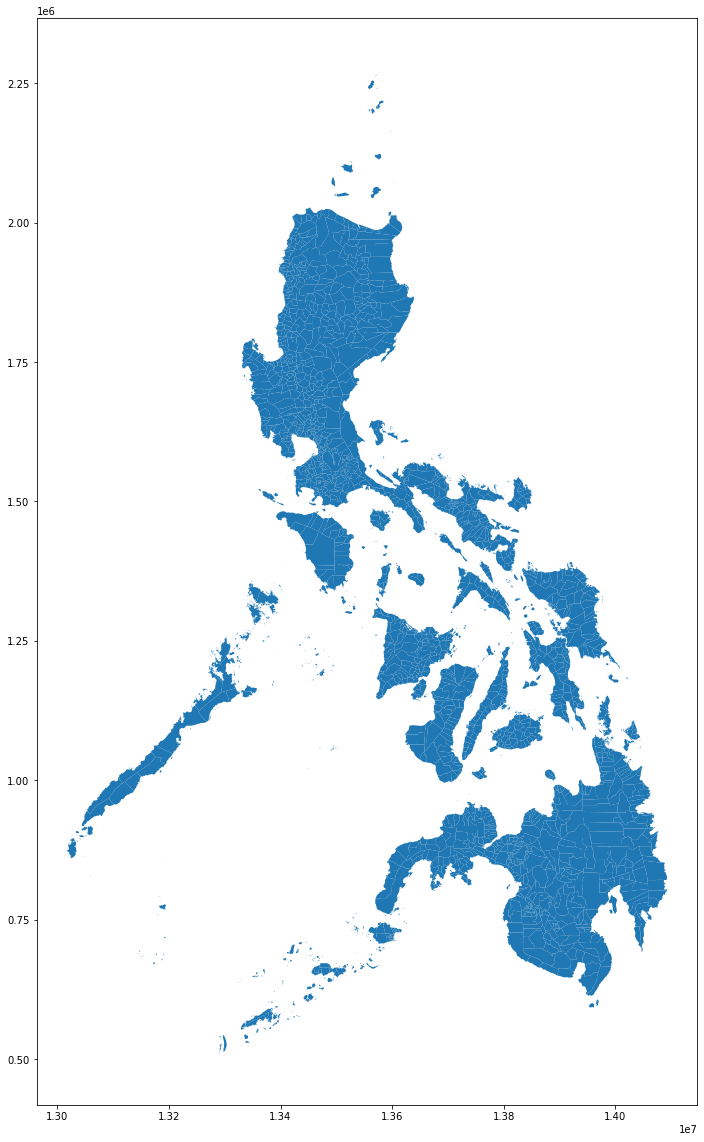

In [19]:
admindiv.plot(figsize=(20, 20))

In [26]:
municipal_net = gp.sjoin(fixed_net, admindiv, how='inner', op='within')
municipal_net.groupby('NAME_2').mean('avg_d_kbps')

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_righ,ID_0_left,ISON,POP2000,SQKM,...,Landlocked,AOSIS,SIDS,Islands,LDC,index_right,ID_0_right,ID_1,ID_2,CCN_2
NAME_2,,,,,,,,,,,,,,,,,,,,,
Aborlan,3565.428571,3090.285714,57.714286,7.714286,1.285714,0.0,179.0,608.0,75653257.0,298133.812,...,0.0,0.0,0.0,1.0,0.0,1207.0,179.0,59.0,1204.0,0.0
Abra de Ilog,8188.000000,7589.500000,32.375000,16.375000,2.875000,0.0,179.0,608.0,75653257.0,298133.812,...,0.0,0.0,0.0,1.0,0.0,1180.0,179.0,57.0,1177.0,0.0
Abucay,15152.488372,19476.255814,51.976744,47.279070,8.697674,0.0,179.0,608.0,75653257.0,298133.812,...,0.0,0.0,0.0,1.0,0.0,134.0,179.0,10.0,135.0,0.0
Abulug,9808.294118,6911.882353,45.882353,7.529412,1.764706,0.0,179.0,608.0,75653257.0,298133.812,...,0.0,0.0,0.0,1.0,0.0,303.0,179.0,18.0,304.0,0.0
Abuyog,5260.041667,2856.000000,122.208333,13.000000,2.375000,0.0,179.0,608.0,75653257.0,298133.812,...,0.0,0.0,0.0,1.0,0.0,859.0,179.0,43.0,856.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wao,4790.400000,2920.800000,98.200000,41.800000,4.600000,0.0,179.0,608.0,75653257.0,298133.812,...,0.0,0.0,0.0,1.0,0.0,858.0,179.0,42.0,855.0,0.0
Zamboanga City,14780.845659,14973.109325,50.221865,72.659164,15.948553,0.0,179.0,608.0,75653257.0,298133.812,...,0.0,0.0,0.0,1.0,0.0,1635.0,179.0,80.0,1631.0,0.0
Zamboanguita,17422.260870,16337.782609,31.304348,16.217391,3.826087,0.0,179.0,608.0,75653257.0,298133.812,...,0.0,0.0,0.0,1.0,0.0,1090.0,179.0,52.0,1087.0,0.0


municipal_net.groupby('NAME_2').mean('avg_d_kbps')['avg_d_kbps']

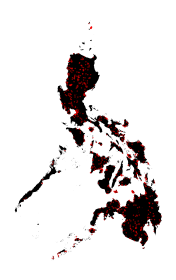

In [12]:
whole_ph.plot(ax=ax, color='black')
centroids_.plot(ax=ax, color='red', alpha=0.5)


a.axes.get_xaxis().set_visible(False); a.axes.get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('../images/ph_centroids.png', transparent=True, pad_inches=0, dpi=300)

In [18]:
# ph_fixed_tiles = gp.read_file(whle_dir).to_crs('+proj=cea')

centroids_ = gp.read_file(centroids_dir).to_crs('+proj=cea')
centroids_.sort_values('DHSCLUST', inplace=True)

In [19]:
# ph_fixed_tiles.set_geometry(ph_fixed_tiles.geometry.centroid, inplace=True)
centroids_.set_geometry(centroids_.geometry.centroid, inplace=True)

In [6]:
#distance_set = []
#for i in centroid_pts[10:30]:
    #distances = []
    #for j in internet_pts:
        #distances.append(i.distance(j) <= 5000)
    #distance_set.append(distances)

#surrounding_pts = []
#for ind, i in enumerate(distance_set):
    #surrounding_pts.append(internet_pts[distance_set[ind]])
#ave_speed_per_cluster = []
#for i in surrounding_pts:
    #speeds = []
    #for _ in i:
        #speeds.append(ph_fixed_tiles[ph_fixed_tiles.geometry == _]['avg_d_kbps'].item())
    #ave_speed_per_cluster.append(np.mean(speeds))

In [5]:
from scipy.stats import skew, kurtosis
def summary_stat(series_, mean_arr, max_arr, min_arr, std_arr, median_arr, skew_arr, cov_arr, kurtosis_arr):
    
    mean_arr.append(np.mean(series_))
    max_arr.append(np.max(series_))
    min_arr.append(np.min(series_))
    std_arr.append(np.std(series_))
    median_arr.append(np.median(series_))
    skew_arr.append(skew(series_))
    cov_arr.append(np.cov(series_))
    kurtosis_arr.append(kurtosis(series_))

In [6]:
# fig, ax = plt.subplots(figsize=(100,100))
# ph_fixed_tiles.plot(ax=ax)
# centroids_.plot(ax=ax)

avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis = [], [], [], [], [], [], [], []
avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis = [], [], [], [], [], [], [], []

buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
datapoints_per_cluster = []
for i in range(len(buffers_)):
    buffers_test = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))[i:i+1]
    intpoint_test = gp.sjoin(ph_fixed_tiles, buffers_test, how='inner', op='within')
    # intpoint_test.plot(ax=ax, color='purple', alpha=0.1)
    _ = summary_stat(intpoint_test.avg_d_kbps, avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis)
    _ = summary_stat(intpoint_test.avg_u_kbps, avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis)
    _ = summary_stat(intpoint_test.avg_lat_ms, avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis)
    datapoints_per_cluster.append(intpoint_test.shape[0])

with_no_data = 0
for i in datapoints_per_cluster:
    with_no_data = with_no_data + 1 if i == 0 else with_no_data
print('The number of points without data is {}, and the number of points with data is {}'.format(with_no_data, len(datapoints_per_cluster) - with_no_data))

# centroids_[:10].plot(ax=ax, color='red')


# buffers_ = gp.GeoDataFrame(geometry=centroids_['geometry'].buffer(5000))
# data_in_buffers = gp.sjoin(ph_fixed_tiles, buffers_, how='inner', op='within')

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/5593023.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/5593023.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov_arr.append(np.cov(series_))
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\envs\pyrosmenv\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_di

The number of points without data is 147, and the number of points with data is 1067


### Save the Summary Statistics as DataFrames

In [7]:
dhsclust = list(centroids_.DHSCLUST)

avg_d_kbps_summary_stats = [dhsclust, avg_d_kbps_cluster_mean, avg_d_kbps_cluster_max, avg_d_kbps_cluster_min, avg_d_kbps_cluster_std, avg_d_kbps_cluster_median, avg_d_kbps_cluster_skew, avg_d_kbps_cluster_cov, avg_d_kbps_cluster_kurtosis, datapoints_per_cluster]
avg_d_kbps_summary_stats = pd.DataFrame(avg_d_kbps_summary_stats).transpose()
avg_d_kbps_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']

avg_u_kbps_summary_stats = [dhsclust, avg_u_kbps_cluster_mean, avg_u_kbps_cluster_max, avg_u_kbps_cluster_min, avg_u_kbps_cluster_std, avg_u_kbps_cluster_median, avg_u_kbps_cluster_skew, avg_u_kbps_cluster_cov, avg_u_kbps_cluster_kurtosis, datapoints_per_cluster]
avg_u_kbps_summary_stats = pd.DataFrame(avg_u_kbps_summary_stats).transpose()
avg_u_kbps_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']


avg_lat_ms_summary_stats = [dhsclust, avg_lat_ms_cluster_mean, avg_lat_ms_cluster_max, avg_lat_ms_cluster_min, avg_lat_ms_cluster_std, avg_lat_ms_cluster_median, avg_lat_ms_cluster_skew, avg_lat_ms_cluster_cov, avg_lat_ms_cluster_kurtosis, datapoints_per_cluster]
avg_lat_ms_summary_stats = pd.DataFrame(avg_lat_ms_summary_stats).transpose()
avg_lat_ms_summary_stats.columns = ['DHS Cluster Number', 'Mean', 'Maximum', 'Minimum', 'Standard Deviation', 'Median', 'Skew', 'Coefficient of Variation', 'Kurtosis', 'Number of Datapoints']

In [8]:
avg_d_kbps_summary_stats.to_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats.to_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats.to_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv')

### Load Summary Statistics

In [3]:
avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv')a

### Summary Statistics On Mean Values (among Clusters)

In [4]:
TM_pal_categorical_3 = ("#ef4631", "#10b9ce", "#ff9138")
sns.set(
    style="white",
    font_scale=1.25,
    palette=TM_pal_categorical_3,
)

Average National Download Speed : 12.95 Mbps
Median of National Download Speed : 12.33 Mbps
Maximum National Download Speed : 34.03 Mbps
Minimum National Download Speed : 0.14 Mbps
Standard Deviation of National Download Speed : 7.43


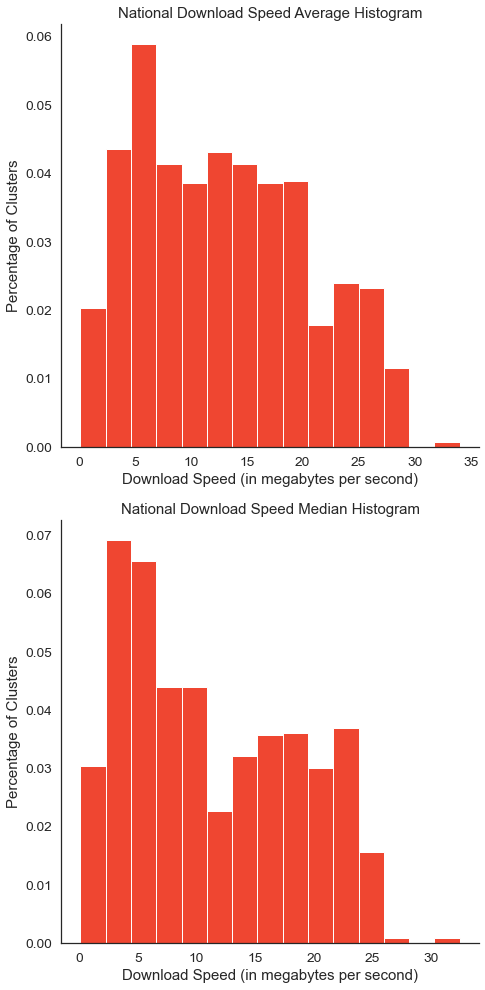

In [11]:
print('Average National Download Speed : {:.2f} Mbps'.format(np.nanmean(avg_d_kbps_summary_stats['Mean'])/1000))
print('Median of National Download Speed : {:.2f} Mbps'.format(np.nanmedian(avg_d_kbps_summary_stats['Mean'])/1000))
print('Maximum National Download Speed : {:.2f} Mbps'.format(max(avg_d_kbps_summary_stats['Mean'])/1000))
print('Minimum National Download Speed : {:.2f} Mbps'.format(min(avg_d_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Download Speed : {:.2f}'.format(np.std(avg_d_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_d_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax[0].set_title('National Download Speed Average Histogram')
_ = ax[0].set_xlabel('Download Speed (in megabytes per second)'); _ = ax[0].set_ylabel('Percentage of Clusters')
_ = sns.despine()

_ = ax[1].hist(avg_d_kbps_summary_stats['Median']/1000, bins=15, density=True)
_ = ax[1].set_title('National Download Speed Median Histogram')
_ = ax[1].set_xlabel('Download Speed (in megabytes per second)'); _ = ax[1].set_ylabel('Percentage of Clusters')

plt.tight_layout()
plt.savefig('../data/internet/images/fixed dl_sumstats_HIST.png', transparent=True)

Average National Upload Speed : 12.21 Mbps
Median of National Upload Speed : 11.45 Mbps
Maximum National Upload Speed : 43.19 Mbps
Minimum National Upload Speed : 0.08 Mbps
Standard Deviation of National Upload Speed : 7.80


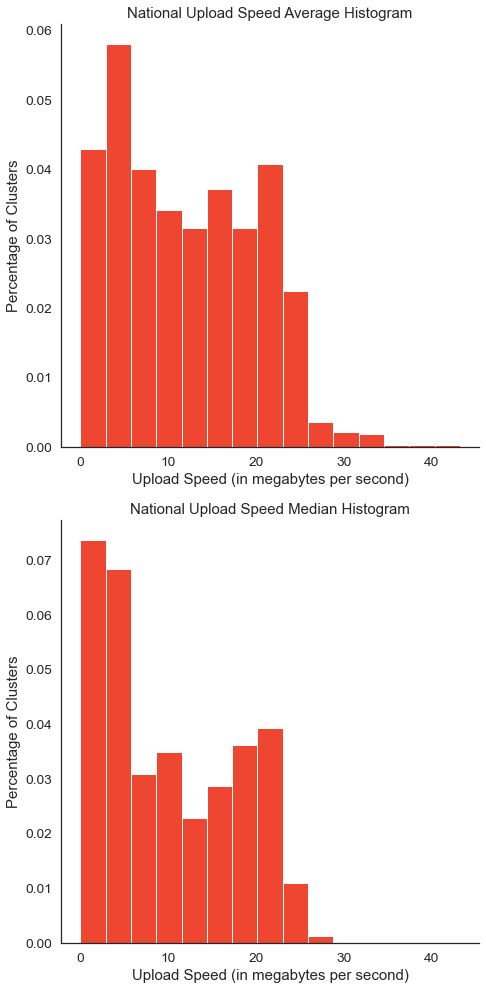

In [13]:
print('Average National Upload Speed : {:.2f} Mbps'.format(np.nanmean(avg_u_kbps_summary_stats['Mean'])/1000))
print('Median of National Upload Speed : {:.2f} Mbps'.format(np.nanmedian(avg_u_kbps_summary_stats['Mean'])/1000))
print('Maximum National Upload Speed : {:.2f} Mbps'.format(max(avg_u_kbps_summary_stats['Mean'])/1000))
print('Minimum National Upload Speed : {:.2f} Mbps'.format(min(avg_u_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Upload Speed : {:.2f}'.format(np.std(avg_u_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_u_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax[0].set_title('National Upload Speed Average Histogram')
_ = ax[0].set_xlabel('Upload Speed (in megabytes per second)'); _ = ax[0].set_ylabel('Percentage of Clusters')

_ = ax[1].hist(avg_u_kbps_summary_stats['Median']/1000, bins=15, density=True)
_ = ax[1].set_title('National Upload Speed Median Histogram')
_ = ax[1].set_xlabel('Upload Speed (in megabytes per second)'); _ = ax[1].set_ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/fixed ul_sumstats_HIST.png', transparent=True)

In [14]:
# count and remove the number of outliers within the interquartile range 0.25 to 0.75

def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

_ = Remove_Outlier_Indices(avg_lat_ms_summary_stats['Mean'])
print('The number of outliers is {}'.format(avg_lat_ms_summary_stats.shape[0] - _.sum()))

avg_lat_ms_summary_stats = avg_lat_ms_summary_stats[_]

The number of outliers is 40


Average National Latency : 51.42 ms
Median of National Latency : 46.00 ms
Maximum National Latency : 124.21 ms
Minimum National Latency : 3.50 ms
Standard Deviation of National Latency : 24.71


C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/14354880.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparency" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../data/internet/images/fixed lat_sumstats_HIST.png', transparency=True)


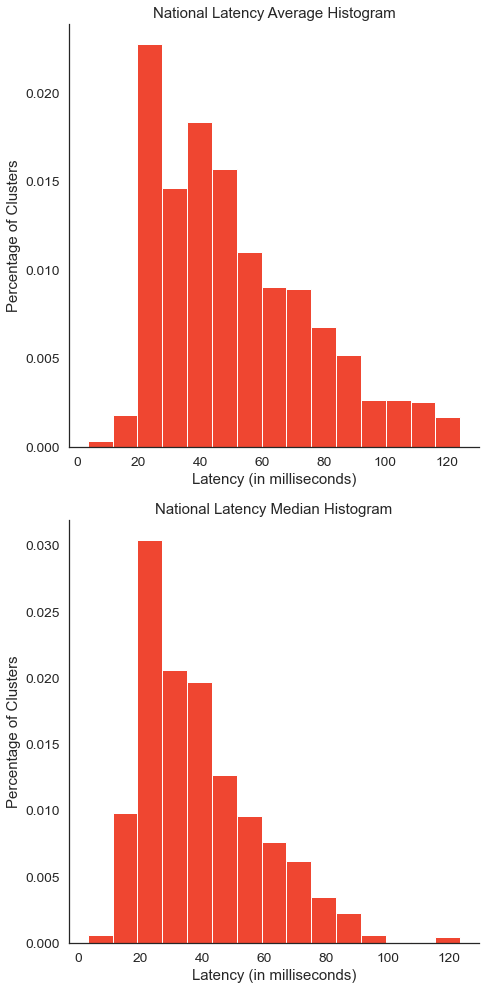

In [16]:
print('Average National Latency : {:.2f} ms'.format(np.nanmean(avg_lat_ms_summary_stats['Mean'])))
print('Median of National Latency : {:.2f} ms'.format(np.nanmedian(avg_lat_ms_summary_stats['Mean'])))
print('Maximum National Latency : {:.2f} ms'.format(max(avg_lat_ms_summary_stats['Mean'])))
print('Minimum National Latency : {:.2f} ms'.format(min(avg_lat_ms_summary_stats['Mean'])))
print('Standard Deviation of National Latency : {:.2f}'.format(np.std(avg_lat_ms_summary_stats['Mean'])))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_lat_ms_summary_stats['Mean'], bins=15, density=True)
_ = ax[0].set_title('National Latency Average Histogram')
_ = ax[0].set_xlabel('Latency (in milliseconds)'); _ = ax[0].set_ylabel('Percentage of Clusters')

_ = ax[1].hist(avg_lat_ms_summary_stats['Median'], bins=15, density=True)
_ = ax[1].set_title('National Latency Median Histogram')
_ = ax[1].set_xlabel('Latency (in milliseconds)'); _ = ax[1].set_ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/fixed lat_sumstats_HIST.png', transparency=True)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/1108922881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datapoints_per_cluster[datapoints_per_cluster == 0] = -1
C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/1108922881.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparency" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../data/internet/images/fixed num_internet_datapoints_HIST.png', transparency=True)


Average Number of Datapoints : 57.13 Points
Median Number of Datapoints : 23.00 Points
Maximum Number of Datapoints : 228.00 Points
Minimum Number of Datapoints : -1.00 Points
Standard Deviation of Number of Datapoints : 68.82


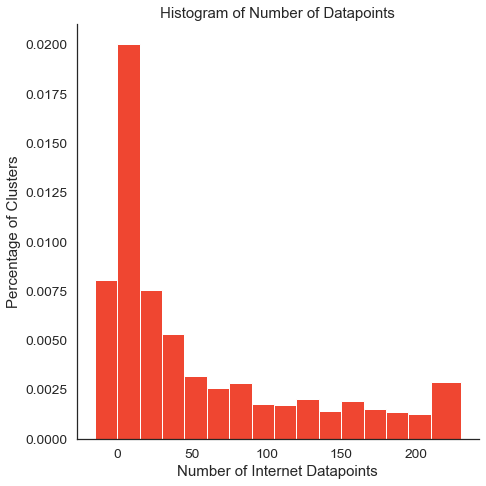

In [17]:
datapoints_per_cluster = avg_d_kbps_summary_stats['Number of Datapoints']
datapoints_per_cluster[datapoints_per_cluster == 0] = -1
bins = [-15, 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 230]

fig, ax = plt.subplots(figsize=(7, 7))

print('Average Number of Datapoints : {:.2f} Points'.format(np.mean(datapoints_per_cluster)))
print('Median Number of Datapoints : {:.2f} Points'.format(np.median(datapoints_per_cluster)))
print('Maximum Number of Datapoints : {:.2f} Points'.format(max(datapoints_per_cluster)))
print('Minimum Number of Datapoints : {:.2f} Points'.format(min(datapoints_per_cluster)))
print('Standard Deviation of Number of Datapoints : {:.2f}'.format(np.std(datapoints_per_cluster)))
_ = plt.hist(datapoints_per_cluster, bins=bins, density=True)
_ = plt.title('Histogram of Number of Datapoints')
_ = plt.xlabel('Number of Internet Datapoints'); _ = plt.ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/fixed num_internet_datapoints_HIST.png', transparency=True)


### Plotting Mean Download Speeds

<AxesSubplot:>

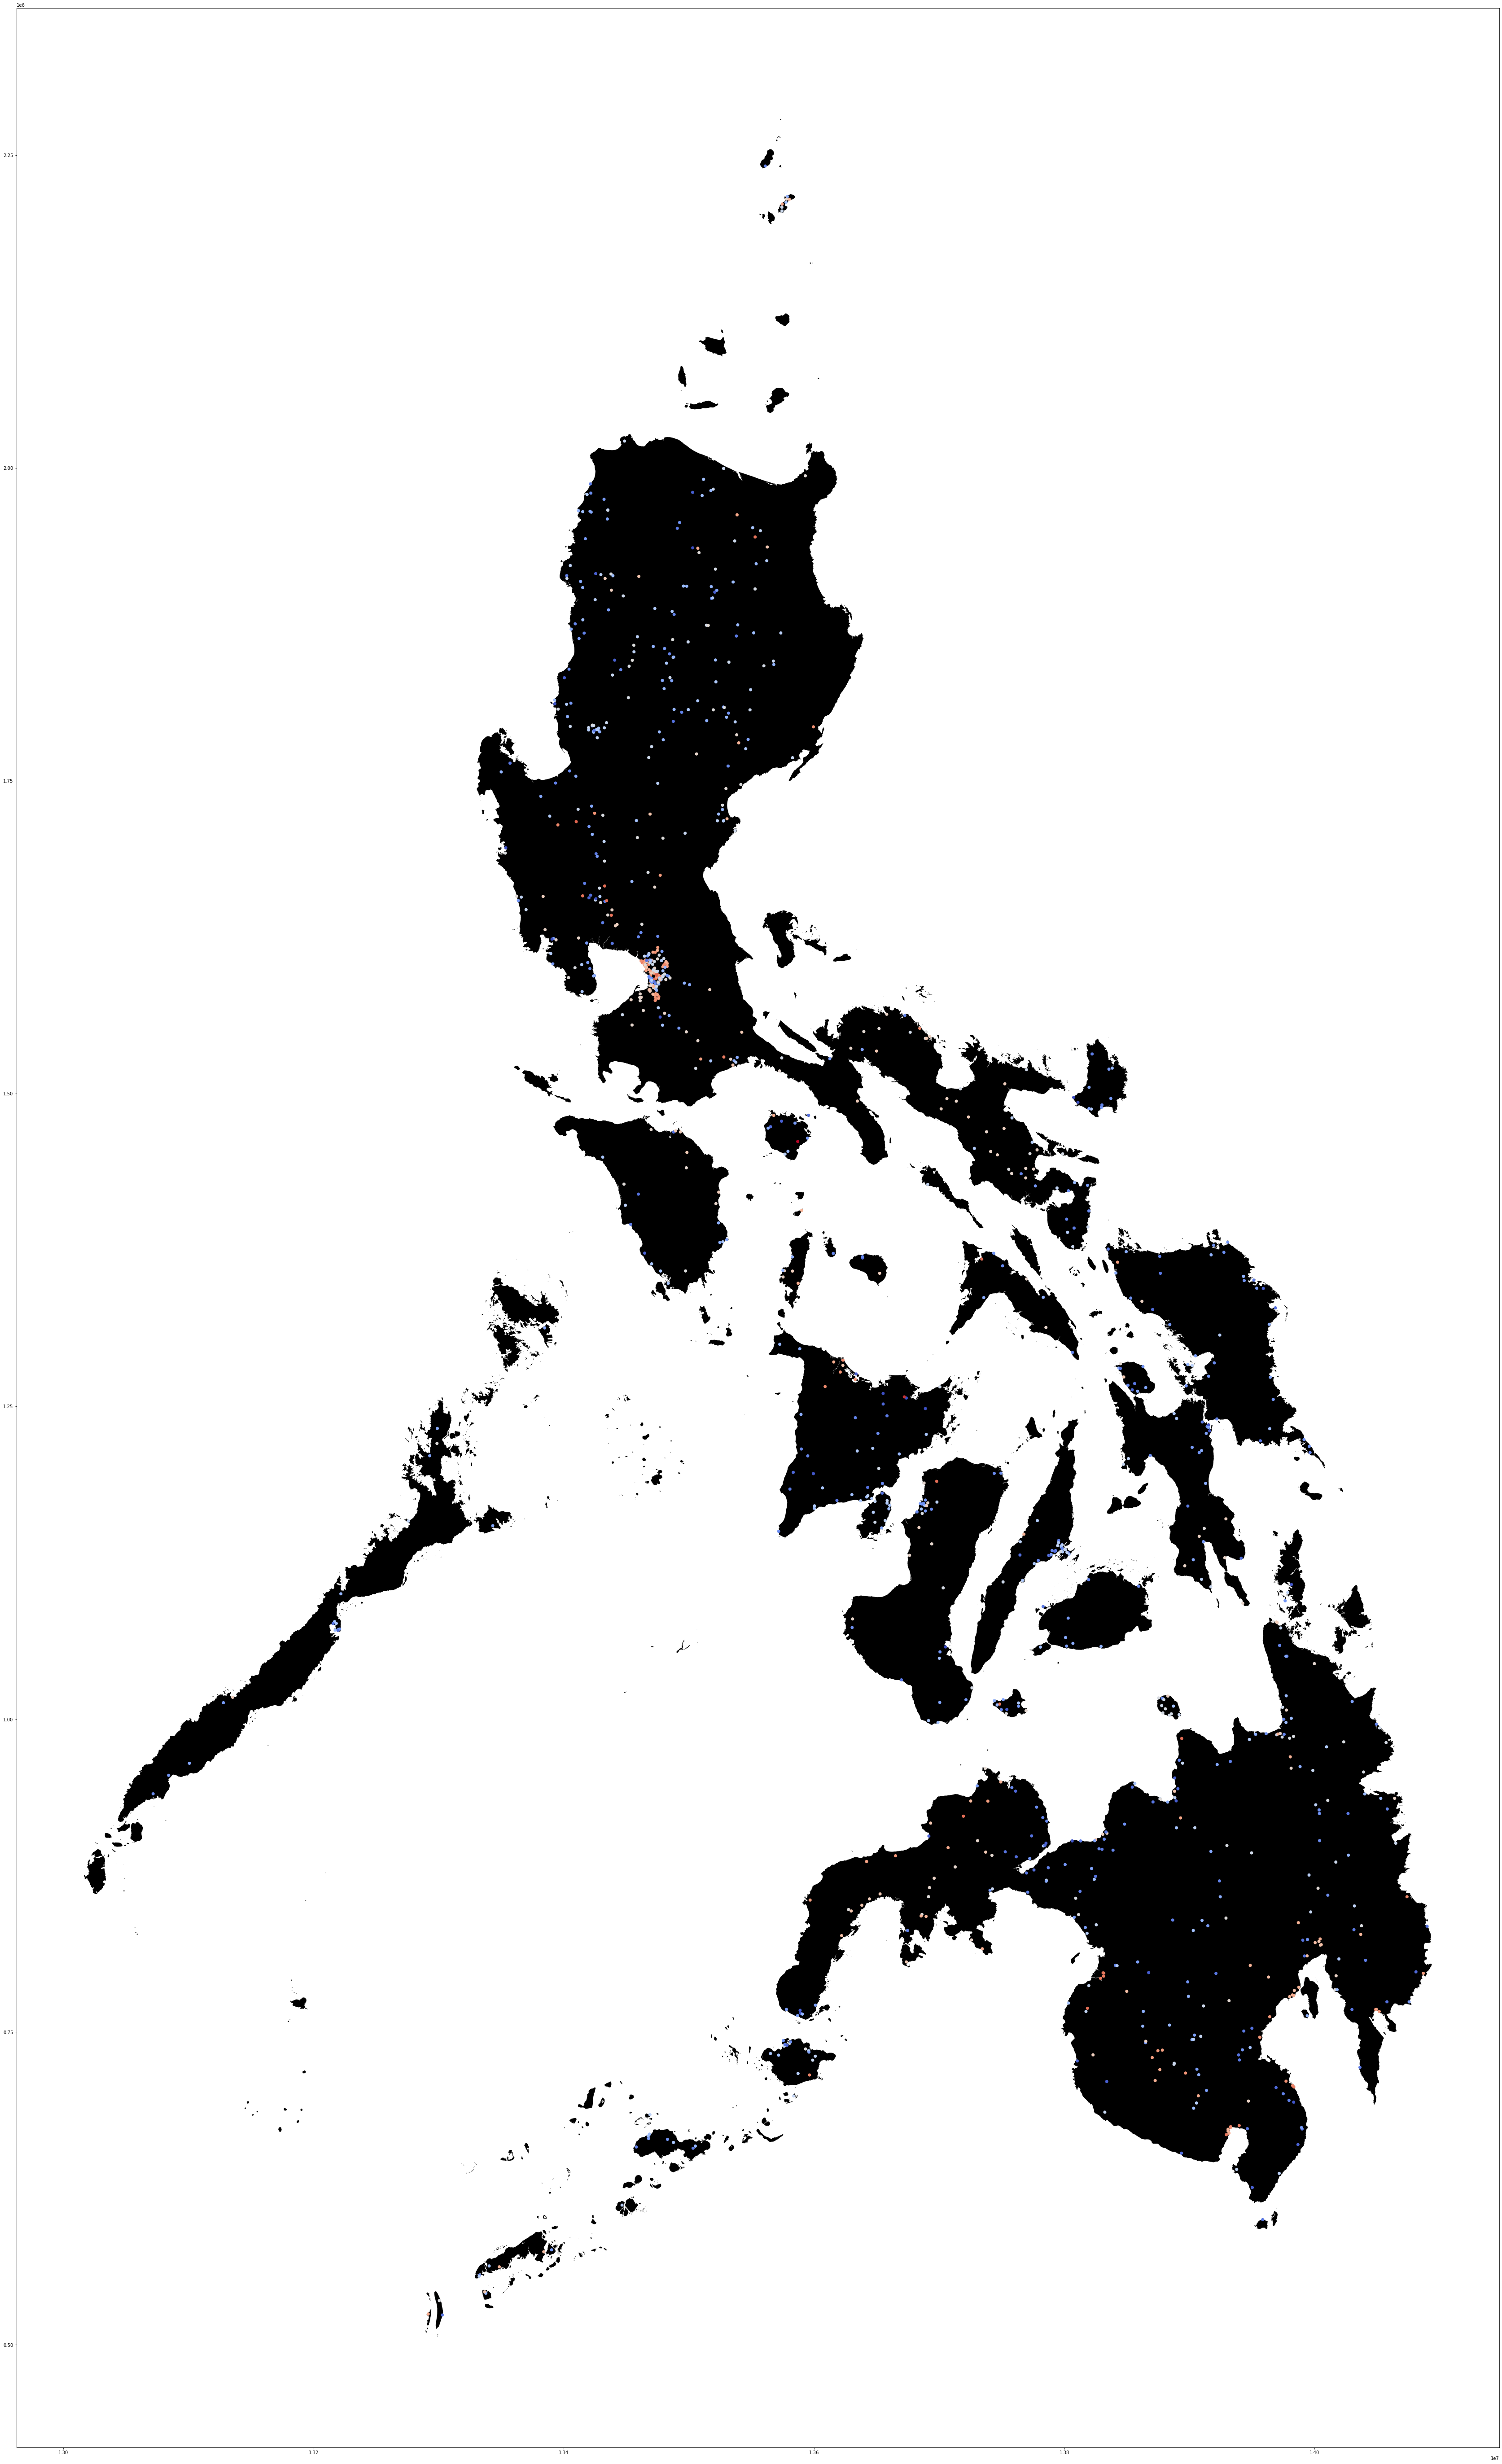

In [58]:
fig, ax = plt.subplots(figsize=(100, 100))

whole_ph_dir = '../data/internet/philippine_boundary/PHL_adm0.shp'
whole_ph = gp.read_file(whole_ph_dir).to_crs('+proj=cea')
whole_ph.plot(ax=ax, color='black')

_ = gp.GeoDataFrame(avg_d_kbps_cluster_mean, geometry=centroids_.geometry)
_.plot(ax=ax, column=0, cmap='coolwarm', legend=False, alpha=1)

### Imputation

In [3]:
avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_10052/3133463364.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv').drop('Unnamed: 0', 1)


In [4]:
avg_d_kbps_summary_stats['Mean'].fillna(min(avg_d_kbps_summary_stats['Mean']), inplace=True)
avg_d_kbps_summary_stats['Minimum'].fillna(min(avg_d_kbps_summary_stats['Minimum']), inplace=True)
avg_d_kbps_summary_stats['Maximum'].fillna(min(avg_d_kbps_summary_stats['Maximum']), inplace=True)
avg_d_kbps_summary_stats['Median'].fillna(min(avg_d_kbps_summary_stats['Median']), inplace=True)
avg_d_kbps_summary_stats['Skew'].fillna(min(avg_d_kbps_summary_stats['Skew']), inplace=True)
avg_d_kbps_summary_stats['Coefficient of Variation'].fillna(max(avg_d_kbps_summary_stats['Coefficient of Variation']), inplace=True)
avg_d_kbps_summary_stats['Kurtosis'].fillna(min(avg_d_kbps_summary_stats['Kurtosis']), inplace=True)
avg_d_kbps_summary_stats['Standard Deviation'].fillna(max(avg_d_kbps_summary_stats['Standard Deviation']), inplace=True)

In [6]:
avg_d_kbps_summary_stats.columns = ['DHS Cluster Number', 'fixed_dl_Mean', 'fixed_dl_Maximum', 'fixed_dl_Minimum',
       'fixed_dl_Standard Deviation', 'fixed_dl_Median', 'fixed_dl_Skew', 'fixed_dl_Coefficient of Variation',
       'fixed_dl_Kurtosis', 'fixed_dl_Number of Datapoints']

In [8]:
avg_d_kbps_summary_stats.to_csv('../data/internet/summary_stats/imputed_fixed download_speeds_summary_stats.csv')

Average National Download Speed : 11.40 Mbps
Median of National Download Speed : 10.55 Mbps
Maximum National Download Speed : 34.03 Mbps
Minimum National Download Speed : 0.14 Mbps
Standard Deviation of National Download Speed : 8.12


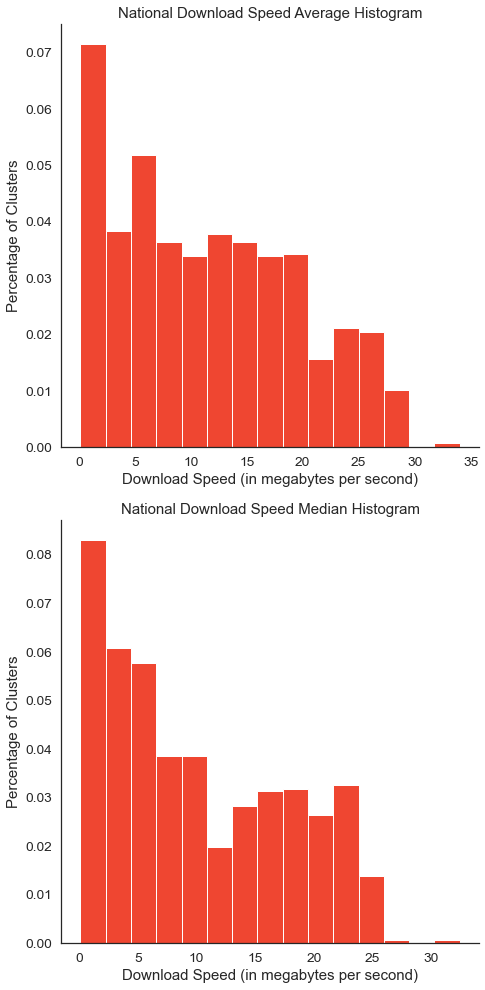

In [20]:
print('Average National Download Speed : {:.2f} Mbps'.format(np.nanmean(avg_d_kbps_summary_stats['Mean'])/1000))
print('Median of National Download Speed : {:.2f} Mbps'.format(np.nanmedian(avg_d_kbps_summary_stats['Mean'])/1000))
print('Maximum National Download Speed : {:.2f} Mbps'.format(max(avg_d_kbps_summary_stats['Mean'])/1000))
print('Minimum National Download Speed : {:.2f} Mbps'.format(min(avg_d_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Download Speed : {:.2f}'.format(np.std(avg_d_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_d_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax[0].set_title('National Download Speed Average Histogram')
_ = ax[0].set_xlabel('Download Speed (in megabytes per second)'); _ = ax[0].set_ylabel('Percentage of Clusters')
_ = sns.despine()

_ = ax[1].hist(avg_d_kbps_summary_stats['Median']/1000, bins=15, density=True)
_ = ax[1].set_title('National Download Speed Median Histogram')
_ = ax[1].set_xlabel('Download Speed (in megabytes per second)'); _ = ax[1].set_ylabel('Percentage of Clusters')

plt.tight_layout()
plt.savefig('../data/internet/images/imputed_fixed dl_sumstats_HIST.png', transparent=True)

In [9]:
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_10052/2055448782.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv').drop('Unnamed: 0', 1)


In [10]:
avg_u_kbps_summary_stats['Mean'].fillna(min(avg_u_kbps_summary_stats['Mean']), inplace=True)
avg_u_kbps_summary_stats['Minimum'].fillna(min(avg_u_kbps_summary_stats['Minimum']), inplace=True)
avg_u_kbps_summary_stats['Maximum'].fillna(min(avg_u_kbps_summary_stats['Maximum']), inplace=True)
avg_u_kbps_summary_stats['Median'].fillna(min(avg_u_kbps_summary_stats['Median']), inplace=True)
avg_u_kbps_summary_stats['Skew'].fillna(min(avg_u_kbps_summary_stats['Skew']), inplace=True)
avg_u_kbps_summary_stats['Coefficient of Variation'].fillna(max(avg_u_kbps_summary_stats['Coefficient of Variation']), inplace=True)
avg_u_kbps_summary_stats['Kurtosis'].fillna(min(avg_u_kbps_summary_stats['Kurtosis']), inplace=True)
avg_u_kbps_summary_stats['Standard Deviation'].fillna(max(avg_u_kbps_summary_stats['Standard Deviation']), inplace=True)

In [12]:
avg_u_kbps_summary_stats.columns = ['DHS Cluster Number', 'fixed_ul_Mean', 'fixed_ul_Maximum', 'fixed_ul_Minimum',
       'fixed_ul_Standard Deviation', 'fixed_ul_Median', 'fixed_ul_Skew', 'fixed_ul_Coefficient of Variation',
       'fixed_ul_Kurtosis', 'Number of Datapoints']

In [14]:
avg_u_kbps_summary_stats.to_csv('../data/internet/summary_stats/imputed_fixed upload_speeds_summary_stats.csv')

Average National Upload Speed : 10.74 Mbps
Median of National Upload Speed : 9.51 Mbps
Maximum National Upload Speed : 43.19 Mbps
Minimum National Upload Speed : 0.08 Mbps
Standard Deviation of National Upload Speed : 8.32


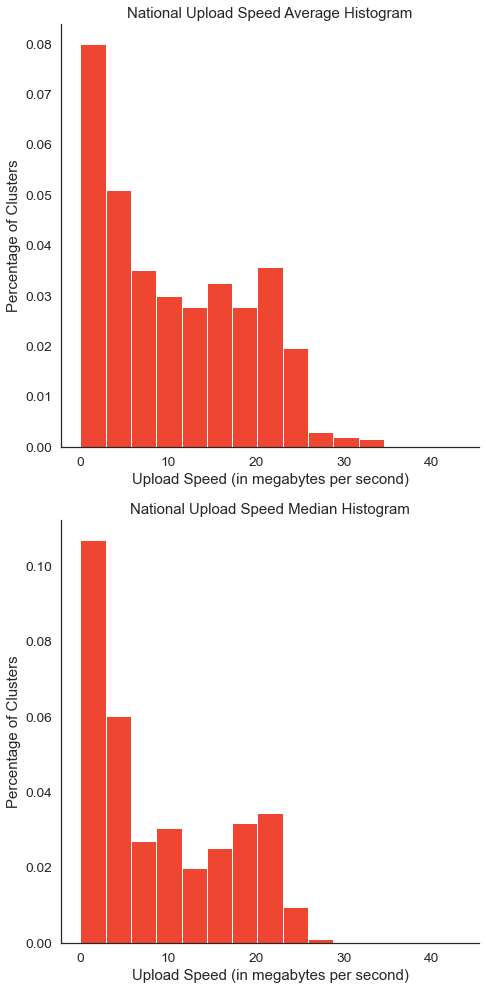

In [23]:
print('Average National Upload Speed : {:.2f} Mbps'.format(np.nanmean(avg_u_kbps_summary_stats['Mean'])/1000))
print('Median of National Upload Speed : {:.2f} Mbps'.format(np.nanmedian(avg_u_kbps_summary_stats['Mean'])/1000))
print('Maximum National Upload Speed : {:.2f} Mbps'.format(max(avg_u_kbps_summary_stats['Mean'])/1000))
print('Minimum National Upload Speed : {:.2f} Mbps'.format(min(avg_u_kbps_summary_stats['Mean'])/1000))
print('Standard Deviation of National Upload Speed : {:.2f}'.format(np.std(avg_u_kbps_summary_stats['Mean']/1000)))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_u_kbps_summary_stats['Mean']/1000, bins=15, density=True)
_ = ax[0].set_title('National Upload Speed Average Histogram')
_ = ax[0].set_xlabel('Upload Speed (in megabytes per second)'); _ = ax[0].set_ylabel('Percentage of Clusters')

_ = ax[1].hist(avg_u_kbps_summary_stats['Median']/1000, bins=15, density=True)
_ = ax[1].set_title('National Upload Speed Median Histogram')
_ = ax[1].set_xlabel('Upload Speed (in megabytes per second)'); _ = ax[1].set_ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/imputed_fixed ul_sumstats_HIST.png', transparent=True)

In [15]:
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv').drop('Unnamed: 0', 1)

C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_10052/53583155.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv').drop('Unnamed: 0', 1)


In [16]:
# mark the outliers
def mark_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList
outliers = mark_outliers(avg_lat_ms_summary_stats['Mean'])

# make outliers NaN
avg_lat_ms_summary_stats.loc[outliers, 'Standard Deviation'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Minimum'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Maximum'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Skew'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Coefficient of Variation'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Kurtosis'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Mean'] = np.nan
avg_lat_ms_summary_stats.loc[outliers, 'Median'] = np.nan

In [17]:
avg_lat_ms_summary_stats['Mean'].fillna(max(avg_lat_ms_summary_stats['Mean']), inplace=True)
avg_lat_ms_summary_stats['Minimum'].fillna(max(avg_lat_ms_summary_stats['Minimum']), inplace=True)
avg_lat_ms_summary_stats['Maximum'].fillna(max(avg_lat_ms_summary_stats['Maximum']), inplace=True)
avg_lat_ms_summary_stats['Median'].fillna(max(avg_lat_ms_summary_stats['Median']), inplace=True)
avg_lat_ms_summary_stats['Skew'].fillna(max(avg_lat_ms_summary_stats['Skew']), inplace=True)
avg_lat_ms_summary_stats['Coefficient of Variation'].fillna(max(avg_lat_ms_summary_stats['Coefficient of Variation']), inplace=True)
avg_lat_ms_summary_stats['Kurtosis'].fillna(max(avg_lat_ms_summary_stats['Kurtosis']), inplace=True)
avg_lat_ms_summary_stats['Standard Deviation'].fillna(max(avg_lat_ms_summary_stats['Standard Deviation']), inplace=True)

In [19]:
avg_lat_ms_summary_stats.columns = ['DHS Cluster Number', 'fixed_lat_Mean', 'fixed_lat_Maximum', 'fixed_lat_Minimum',
       'fixed_lat_Standard Deviation', 'fixed_lat_Median', 'fixed_lat_Skew', 'fixed_lat_Coefficient of Variation',
       'fixed_lat_Kurtosis', 'fixed_lat_Number of Datapoints']

In [20]:
avg_lat_ms_summary_stats.to_csv('../data/internet/summary_stats/imputed_fixed latency_summary_stats.csv')

Average National Latency : 62.63 ms
Median of National Latency : 51.67 ms
Maximum National Latency : 124.21 ms
Minimum National Latency : 3.50 ms
Standard Deviation of National Latency : 34.74


C:\Users\IANANG~1\AppData\Local\Temp/ipykernel_7244/3361564327.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "transparency" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../data/internet/images/imputed_fixed lat_sumstats_HIST.png', transparency=True)


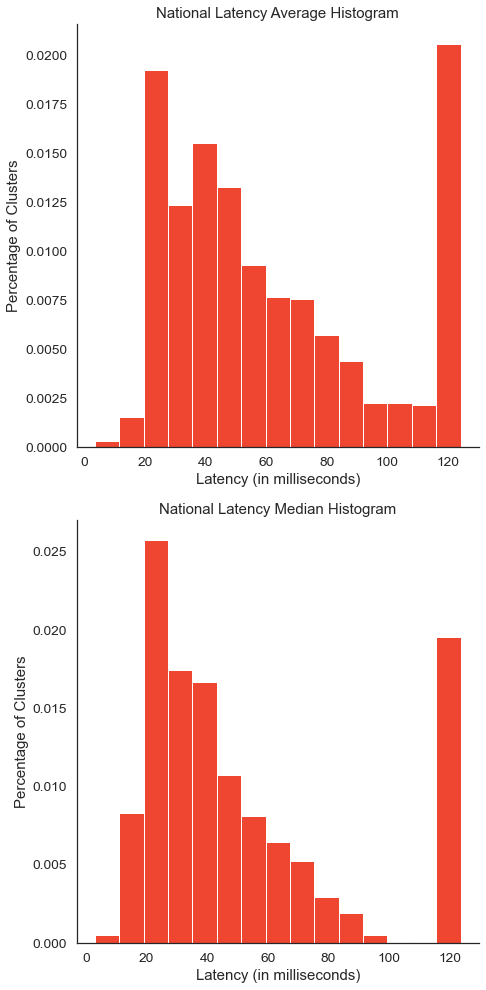

In [31]:
print('Average National Latency : {:.2f} ms'.format(np.nanmean(avg_lat_ms_summary_stats['Mean'])))
print('Median of National Latency : {:.2f} ms'.format(np.nanmedian(avg_lat_ms_summary_stats['Mean'])))
print('Maximum National Latency : {:.2f} ms'.format(max(avg_lat_ms_summary_stats['Mean'])))
print('Minimum National Latency : {:.2f} ms'.format(min(avg_lat_ms_summary_stats['Mean'])))
print('Standard Deviation of National Latency : {:.2f}'.format(np.std(avg_lat_ms_summary_stats['Mean'])))

fig, ax = plt.subplots(2, figsize=(7, 14))

_ = ax[0].hist(avg_lat_ms_summary_stats['Mean'], bins=15, density=True)
_ = ax[0].set_title('National Latency Average Histogram')
_ = ax[0].set_xlabel('Latency (in milliseconds)'); _ = ax[0].set_ylabel('Percentage of Clusters')

_ = ax[1].hist(avg_lat_ms_summary_stats['Median'], bins=15, density=True)
_ = ax[1].set_title('National Latency Median Histogram')
_ = ax[1].set_xlabel('Latency (in milliseconds)'); _ = ax[1].set_ylabel('Percentage of Clusters')

sns.despine()
plt.tight_layout()
plt.savefig('../data/internet/images/imputed_fixed lat_sumstats_HIST.png', transparency=True)

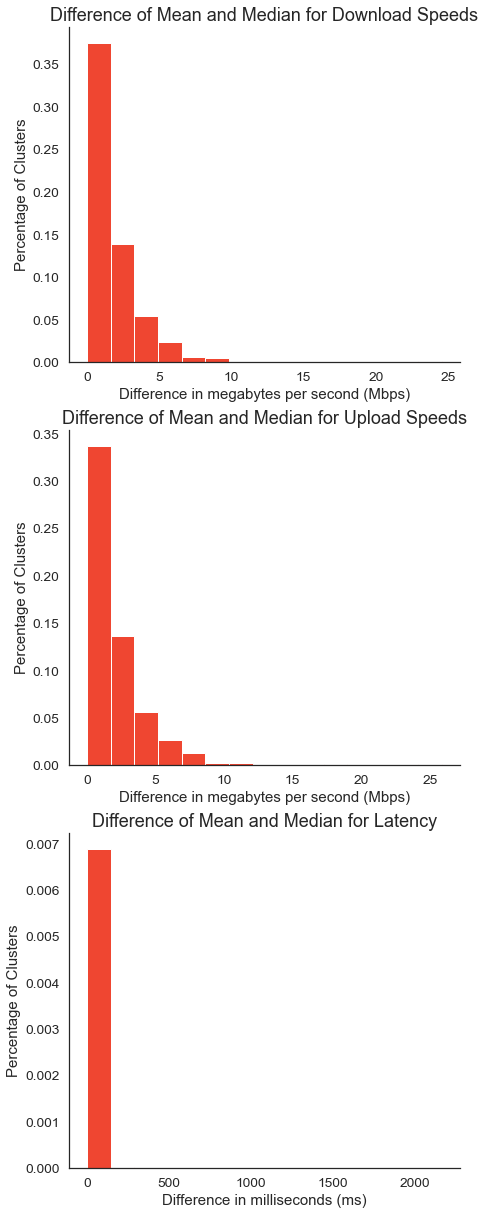

In [25]:
# mean minus median, not imputed

avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/fixed latency_summary_stats.csv')

fig, ax = plt.subplots((3), figsize=(7, 21))
avg_d_kbps_summary_stats['MeanMinusMedian'] = np.abs(avg_d_kbps_summary_stats['Mean'] - avg_d_kbps_summary_stats['Median'])
avg_u_kbps_summary_stats['MeanMinusMedian'] = np.abs(avg_u_kbps_summary_stats['Mean'] - avg_u_kbps_summary_stats['Median'])
avg_lat_ms_summary_stats['MeanMinusMedian'] = np.abs(avg_lat_ms_summary_stats['Mean'] - avg_lat_ms_summary_stats['Median'])
_ = ax[0].hist(avg_d_kbps_summary_stats['MeanMinusMedian']/1000, bins=15, density=True); _ = ax[0].set_title('Difference of Mean and Median for Download Speeds', size=18); _ = ax[0].set_ylabel('Percentage of Clusters'); _ = ax[0].set_xlabel('Difference in megabytes per second (Mbps)')
_ = ax[1].hist(avg_u_kbps_summary_stats['MeanMinusMedian']/1000, bins=15, density=True); _ = ax[1].set_title('Difference of Mean and Median for Upload Speeds', size=18); _ = ax[1].set_ylabel('Percentage of Clusters'); _ = ax[1].set_xlabel('Difference in megabytes per second (Mbps)')
_ = ax[2].hist(avg_lat_ms_summary_stats['MeanMinusMedian'], bins=15, density=True); _ = ax[2].set_title('Difference of Mean and Median for Latency', size=18); _ = ax[2].set_ylabel('Percentage of Clusters'); _ = ax[2].set_xlabel('Difference in milliseconds (ms)')

sns.despine()

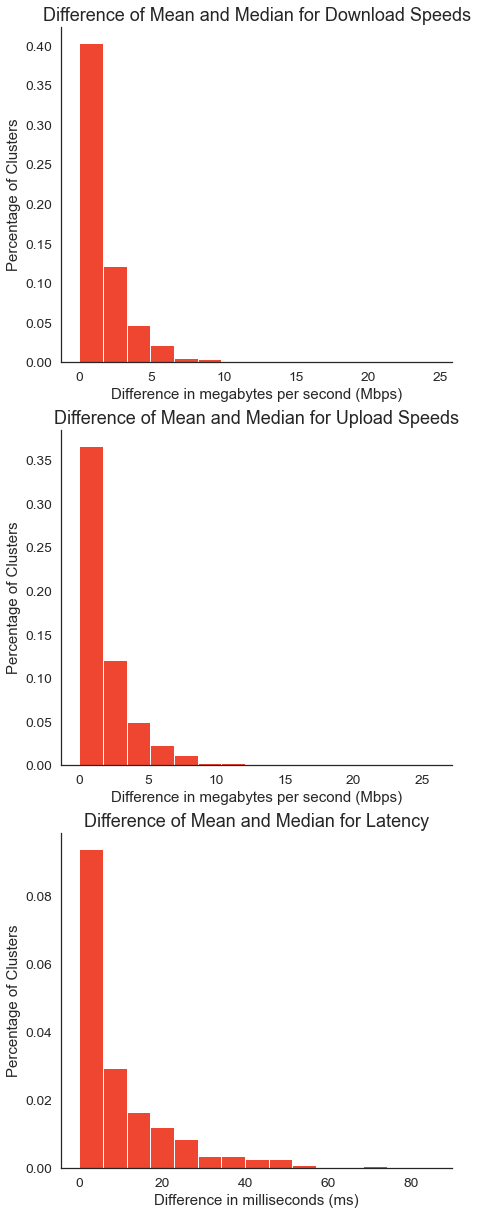

In [27]:
# mean minus median, imputed

avg_d_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/imputed_fixed download_speeds_summary_stats.csv')
avg_u_kbps_summary_stats = pd.read_csv('../data/internet/summary_stats/imputed_fixed upload_speeds_summary_stats.csv')
avg_lat_ms_summary_stats = pd.read_csv('../data/internet/summary_stats/imputed_fixed latency_summary_stats.csv')

fig, ax = plt.subplots((3), figsize=(7, 21))
avg_d_kbps_summary_stats['MeanMinusMedian'] = np.abs(avg_d_kbps_summary_stats['Mean'] - avg_d_kbps_summary_stats['Median'])
avg_u_kbps_summary_stats['MeanMinusMedian'] = np.abs(avg_u_kbps_summary_stats['Mean'] - avg_u_kbps_summary_stats['Median'])
avg_lat_ms_summary_stats['MeanMinusMedian'] = np.abs(avg_lat_ms_summary_stats['Mean'] - avg_lat_ms_summary_stats['Median'])
_ = ax[0].hist(avg_d_kbps_summary_stats['MeanMinusMedian']/1000, bins=15, density=True); _ = ax[0].set_title('Difference of Mean and Median for Download Speeds', size=18); _ = ax[0].set_ylabel('Percentage of Clusters'); _ = ax[0].set_xlabel('Difference in megabytes per second (Mbps)')
_ = ax[1].hist(avg_u_kbps_summary_stats['MeanMinusMedian']/1000, bins=15, density=True); _ = ax[1].set_title('Difference of Mean and Median for Upload Speeds', size=18); _ = ax[1].set_ylabel('Percentage of Clusters'); _ = ax[1].set_xlabel('Difference in megabytes per second (Mbps)')
_ = ax[2].hist(avg_lat_ms_summary_stats['MeanMinusMedian'], bins=15, density=True); _ = ax[2].set_title('Difference of Mean and Median for Latency', size=18); _ = ax[2].set_ylabel('Percentage of Clusters'); _ = ax[2].set_xlabel('Difference in milliseconds (ms)')

sns.despine()